In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,matthews_corrcoef, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.preprocessing import StandardScaler

from itertools import product

In [2]:
pd.set_option('display.max_columns', 100) # replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 100) # replace n with the number of rows you want to see completely

In [3]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [4]:
# Define the scaler and apply to the data
scaler = StandardScaler()
temp = data['Amount']
data['Amount'] = scaler.fit_transform(temp.values.reshape(-1, 1))

In [5]:
# Dividing the X(features) and the Y(target) from the dataset
X = data.drop(["Class", "Time"], axis=1).values
Y = data["Class"].values
print(f'X shape: {X.shape}\nY shape: {Y.shape}')

X shape: (284807, 29)
Y shape: (284807,)


In [6]:
# Create the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [7]:
# Define the resampling method
resampling = SMOTE()
# Create the resampled feature set
X_resampled_train, Y_resampled_train = resampling.fit_sample(X_train, Y_train)

In [8]:
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    From:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-
        examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [9]:
def evaluate(model_name, actual, prediction):
    print("the Model used is {}".format(model_name))
    acc = accuracy_score(actual, prediction)
    print("The accuracy is {}".format(acc))
    prec = precision_score(actual, prediction)
    print("The precision is {}".format(prec))
    rec = recall_score(actual, prediction)
    print("The recall is {}".format(rec))
    f1 = f1_score(actual, prediction)
    print("The F1-Score is {}".format(f1))
    mcc = matthews_corrcoef(actual, prediction)
    print("The Matthews correlation coefficient is {}".format(mcc))
    # Print the classifcation report and confusion matrix
    print("Classification report:\n", classification_report(actual, prediction))
    conf_mat = confusion_matrix(y_true=actual, y_pred=prediction)
    print("Confusion matrix:\n", conf_mat)
    plot_confusion_matrix(conf_mat)

In [10]:
def eval_roc(model, x_test, y_test):
    # Predict probabilities
    probs = model.predict_proba(x_test)
    # Print the ROC curve
    print('ROC Score:')
    print(roc_auc_score(y_test, probs[:,1]))

/opt/anaconda3/envs/ccfd/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


the Model used is Logistic Regression
The accuracy is 0.9754924335521927
The precision is 0.06089309878213803
The recall is 0.9183673469387755
The F1-Score is 0.11421319796954316
The Matthews correlation coefficient is 0.23303860373483
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83214  2082]
 [   12   135]]
Confusion matrix, without normalization


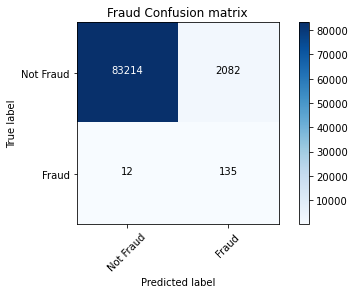

ROC Score:
0.9838237184763232


In [11]:
# Logistic Regression
# Fit a logistic regression model to resampled data
lr = LogisticRegression(solver='sag')
lr.fit(X_resampled_train, Y_resampled_train)
# Obtain model predictions
lr_predicted = lr.predict(X_test)
evaluate("Logistic Regression", Y_test, lr_predicted)
# ROC score of logistic regression
eval_roc(lr, X_test, Y_test)

In [ ]:
# Support Vector Machine
# Fit a Support Vector Machine to resampled data
svc = SVC(kernel='linear')
svc.fit(X_resampled_train, Y_resampled_train)
# Obtain model predictions
svc_predicted = svc.predict(X_test)
evaluate("Support Vector Machine", Y_test, svc_predicted)
# ROC score of logistic regression
eval_roc(svc, X_test, Y_test)

the Model used is Random Forest
The accuracy is 0.9995318516437859
The precision is 0.9083969465648855
The recall is 0.8095238095238095
The F1-Score is 0.856115107913669
The Matthews correlation coefficient is 0.8573071283161536
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.81      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    12]
 [   28   119]]
Confusion matrix, without normalization


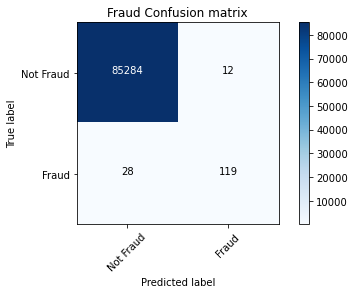

ROC Score:
0.9639869547518877


In [12]:
# Random Forest
# Define the model as the random forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_resampled_train,Y_resampled_train)
# Obtain model predictions
rf_predicted = rf.predict(X_test)
evaluate("Random Forest", Y_test, rf_predicted)
# ROC score of Random Forest
eval_roc(rf, X_test, Y_test)

the Model used is Artificial Neural Network
The accuracy is 0.9993211848834895
The precision is 0.7986577181208053
The recall is 0.8095238095238095
The F1-Score is 0.8040540540540542
The Matthews correlation coefficient is 0.8037324837579382
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.81      0.80       147

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85266    30]
 [   28   119]]
Confusion matrix, without normalization


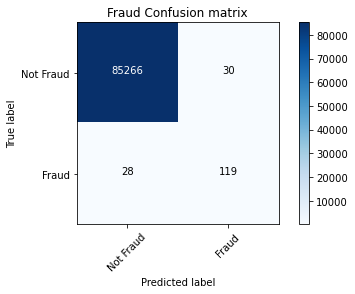

ROC Score:
0.9631354980559096


In [13]:
# Artificial Neural Network
# Define the model as ANN with only 1 hidden layer
ann = MLPClassifier(random_state=0, hidden_layer_sizes=(100,))
ann.fit(X_resampled_train,Y_resampled_train)
# predictions
ann_predicted = ann.predict(X_test)
evaluate("Artificial Neural Network", Y_test, ann_predicted)
# ROC score of ANN
eval_roc(ann, X_test, Y_test)

the Model used is Artificial Neural Network
The accuracy is 0.9992626663389628
The precision is 0.78
The recall is 0.7959183673469388
The F1-Score is 0.7878787878787878
The Matthews correlation coefficient is 0.7875498349881227
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.80      0.79       147

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85263    33]
 [   30   117]]
Confusion matrix, without normalization


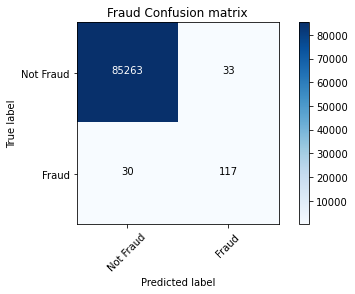

ROC Score:
0.9551811251606253


In [14]:
# Artificial Neural Network
# Define the model as ANN with 2 or more hidden layer
ann = MLPClassifier(random_state=0, hidden_layer_sizes=(100, 100))
ann.fit(X_resampled_train,Y_resampled_train)
# predictions
ann_predicted = ann.predict(X_test)
evaluate("Artificial Neural Network", Y_test, ann_predicted)
# ROC score of ANN
eval_roc(ann, X_test, Y_test)

In [22]:
def tune_ann(hidden_layers, activations, solvers, learning_rates, learning_rate_inits):
    best_h = None
    best_a = None
    best_s = None
    best_lr = None
    best_lri = None
    best_recall = 0
    best_accuracy = 0
    best_predicted = None
    for h in hidden_layers:
        for a in activations:
            for s in solvers:
                for lr in learning_rates:
                    for lri in learning_rate_inits:
                        model = MLPClassifier(random_state=0, hidden_layer_sizes=h, activation=a, solver=s,
                                              learning_rate=lr, learning_rate_init=lri)
                        model.fit(X_resampled_train,Y_resampled_train)
                        model_predicted = model.predict(X_test)
                        rec = recall_score(Y_test, model_predicted)
                        acc = accuracy_score(Y_test, model_predicted)
                        if rec > best_recall:
                            best_h = h
                            best_a = a
                            best_s = s
                            best_lr = lr
                            best_lri = lri
                            best_recall = rec
                            best_accuracy = acc
                            best_predicted = model_predicted
                        elif rec == best_recall and acc > best_accuracy:
                            best_h = h
                            best_a = a
                            best_s = s
                            best_lr = lr
                            best_lri = lri
                            best_recall = rec
                            best_accuracy = acc
                            best_predicted = model_predicted
    print("Best hidden layer:", best_h)
    print("Best activation:", best_a)
    print("Best solver:", best_s)
    print("Best learning_rate:", best_lr)
    print("Best learning_rate_init:", best_lri)
    print("Corresponding Recall:", best_recall)
    print("Corresponding Accuracy:", best_accuracy)
    conf_mat = confusion_matrix(y_true=Y_test, y_pred=best_predicted)
    print("Confusion matrix:\n", conf_mat)
    plot_confusion_matrix(conf_mat)

In [ ]:
# Tune ANN: 

In [ ]:
# current best param: (250,)

In [ ]:
# params tried: 
# hidden_layers: (100,), (200,), (250,), (100, 100), (100, 200), (200, 100), (200, 200), (300,), (100, 100, 100), 


Best hidden layer: (250,)
Best activation: relu
Best solver: sgd
Best learning_rate: constant
Best learning_rate_init: 0.001
Corresponding Recall: 0.8367346938775511
Corresponding Accuracy: 0.9970155542291352
Confusion matrix:
 [[85065   231]
 [   24   123]]
Confusion matrix, without normalization


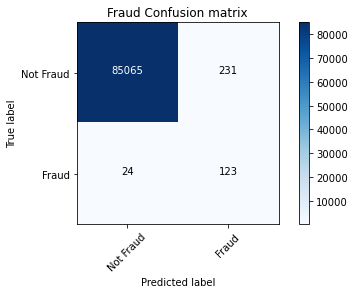

In [23]:
tune_ann(hidden_layers=[(250,)], 
         activations=['relu'], 
         solvers=['adam', 'sgd'], 
         learning_rates=['constant'], 
         learning_rate_inits=[0.001])